In [1]:
#import necessary packages
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
driver = webdriver.Chrome(r"C:\Users\ASUS\chromedriver")

In [3]:
#creating a dictionary for storing the information after scraping
jobs={"roles":[],"companies":[],"locations":[],"experience":[],"skills":[]}
#df = pd.DataFrame(columns=["roles","companies","locations","experience","skills"])

In [4]:
#iterate over first 30 pages; each page contains 20 results
#for each job we will scrape the role,company, location, experience, skills

for i in range(50):
    #driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    driver.get("https://www.naukri.com/data-analyst-jobs-in-india?k=data%20analyst&l=india".format(i))
    time.sleep(3)
    lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")
    
    for job in lst:
        driver.implicitly_wait(10)
        role=job.find_element_by_css_selector("a.title.fw500.ellipsis").text
        company=job.find_element_by_css_selector("a.subTitle.ellipsis.fleft").text
        location=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.location").text
        exp=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.experience").text
        skills=job.find_element_by_css_selector(".tags.has-description").text
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["skills"].append(skills)

In [5]:
DA_jobs_df=pd.DataFrame(jobs)
DA_jobs_df.to_csv("DataAnalyst_jobs.csv")

In [6]:
DA_jobs_df=pd.read_csv("DataAnalyst_jobs.csv", index_col=0)
DA_jobs_df.head(20)

,roles,companies,locations,experience,skills
0,Business Data Analyst,United Phosphorus Limited,Mumbai,5-7 Yrs,Data Extraction\nData Visualization\nQlikView\...
1,Business Data Analyst/Sr. Business Data Analyst,IVY SOFTWARE DEVELOPMENT SERVICES PVT LTD,Hyderabad/Secunderabad,3-8 Yrs,Adobe Analytics\nPower BI\nGoogle Big query\na...
2,Business Data Analyst - MIS & Reporting,INTERTRUST GROUP,"Mumbai, Bangalore/Bengaluru",3-8 Yrs,SQL Server\nTableau\nETL\nSpotfire\nData Engin...
3,Data Analyst/Business Analyst,Credit Suisse,Pune,7-12 Yrs,Wealth Management\nInvestment Banking\nProject...
4,Senior Data Analyst,Verizon Data Services India Pvt.Ltd,Bangalore/Bengaluru,3-6 Yrs,Product management\nMachine learning\ndata gov...
5,Senior Data Analyst - Data Lineage,Opex Global Services,Bangalore/Bengaluru,5-10 Yrs,Data Quality\nData Analysis\nQuality Managemen...
6,Data Analyst,AG Technologies pvt Ltd,"Noida, Kolkata, Hyderabad/Secunderabad, Pune, ...",0-2 Yrs,communication\nAP\nO2C\nSAP\nP2P\nanalytical\n...
7,Data Analyst,AG Technologies pvt Ltd,"Noida, Kolkata, Hyderabad/Secunderabad, Pune, ...",0-2 Yrs,IT Skills\nSAP\nSAP ABAP\nSap Data Services\nSQL
8,Data Analyst - Informatica MDM,Shell India Markets Private Limited,Bangalore/Bengaluru,6-9 Yrs,Informatica Data Quality\nMDM\nMaster Data Man...
9,Excel VBA Jobs Bangalore | VBA data analyst Jobs,Mind Circus Innovation,"Mysore/Mysuru, Coimbatore, Bangalore/Bengaluru",0-1 Yrs,Excel\nVBA\nData Analysis\nwork from home\nWor...


In [7]:
#lets check if our data have any null values
DA_jobs_df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        0
dtype: int64

In [9]:
#lets drop the missing values
#DA_jobs_df=DA_jobs_df.dropna()

In [8]:
#lets check if our data have any dupplicate data
DA_jobs_df[DA_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(980, 5)

In [9]:
print("Before dropping duplicates : ",DA_jobs_df.shape)
DA_jobs_df.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : ",DA_jobs_df.shape)

Before dropping duplicates :  (1000, 5)
After dropping duplicates :  (20, 5)


In [12]:
#lets lower case all the strings to avoid redundancy
DA_jobs_df=DA_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DA_jobs_df.skills=[skill.split("\n") for skill in DA_jobs_df.skills]
DA_jobs_df.locations=[location.split(",") for location in DA_jobs_df.locations]
DA_jobs_df[15:20]

,roles,companies,locations,experience,skills
15,merilytics - business analyst - data analytics...,meritus intelytics private limited,"[[""['hyderabad/secunderabad']""]]",0-3 yrs,"[[""['excel', 'analytics', 'python', 'data anal..."
16,senior data analyst,eli research india private limited,"[[""['hyderabad/secunderabad'"", "" ' faridabad'...",3-5 yrs,"[[""['ms sql', 'data analysis', 'datasets', 'da..."
17,senior data analyst & modeller,tech mahindra ltd,"[[""['hyderabad/secunderabad']""]]",3-7 yrs,"[[""['excellent communication', 'data mining', ..."
18,data analyst,disha consultants,"[[""['pune'"", "" ' chennai'"", "" ' jaipur'"", ""...",2-4 yrs,"[[""['data analysis', 'data validation', 'data ..."
19,data analyst/engineer - vba/python,decision point,"[[""['gurgaon/gurugram']""]]",1-3 yrs,"[[""['r', 'vba', 'mysql', 'database administrat..."


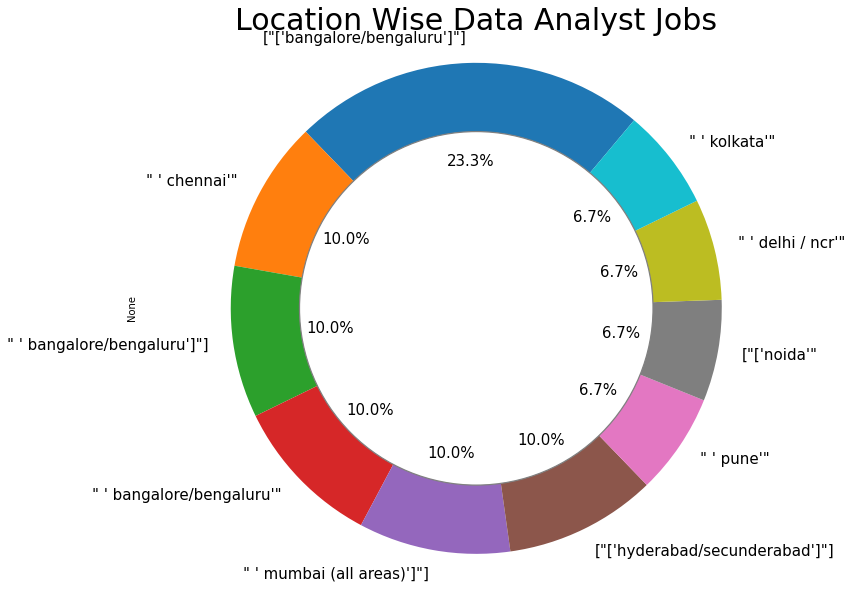

In [13]:
DA_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data Analyst Jobs",fontsize=30)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

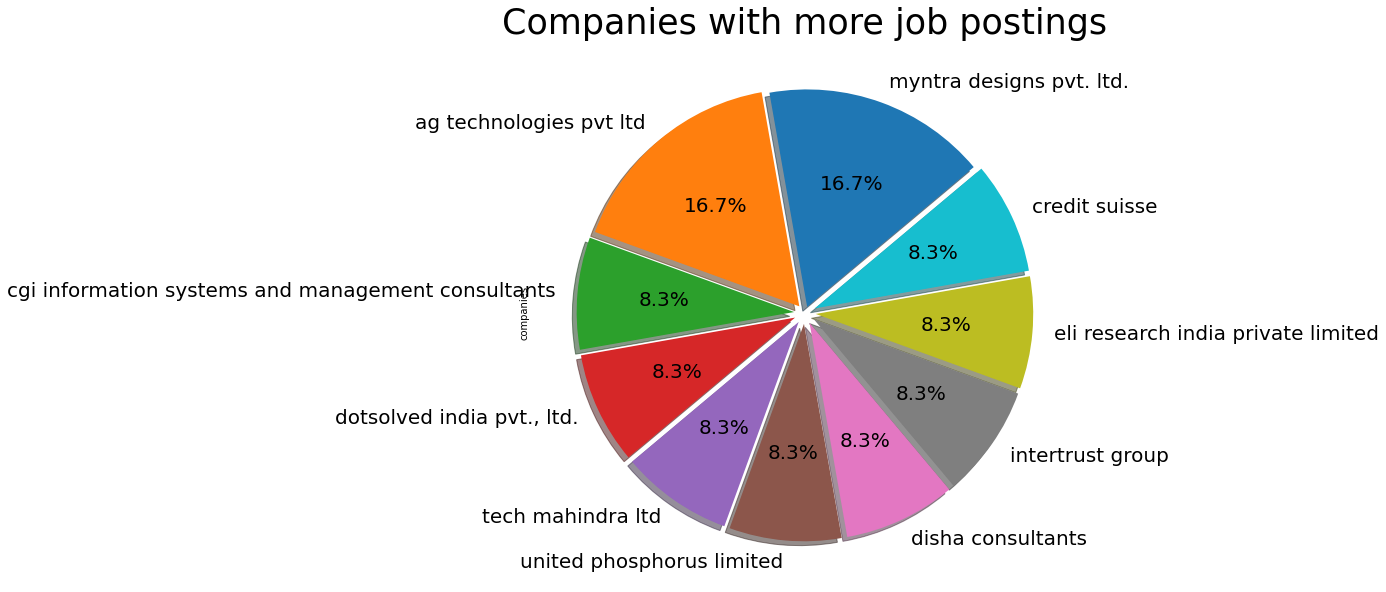

In [14]:
DA_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

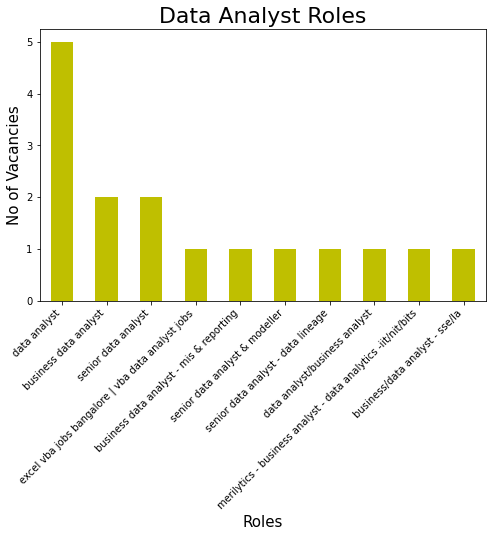

In [15]:
### Roles
DA_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Analyst Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

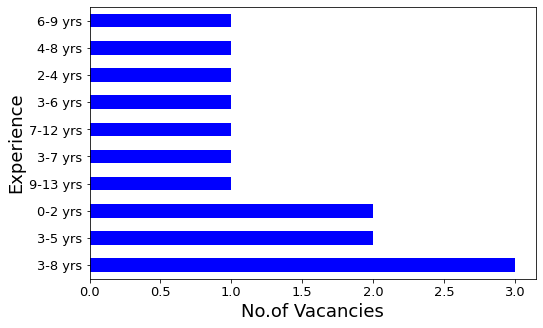

In [16]:
DA_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

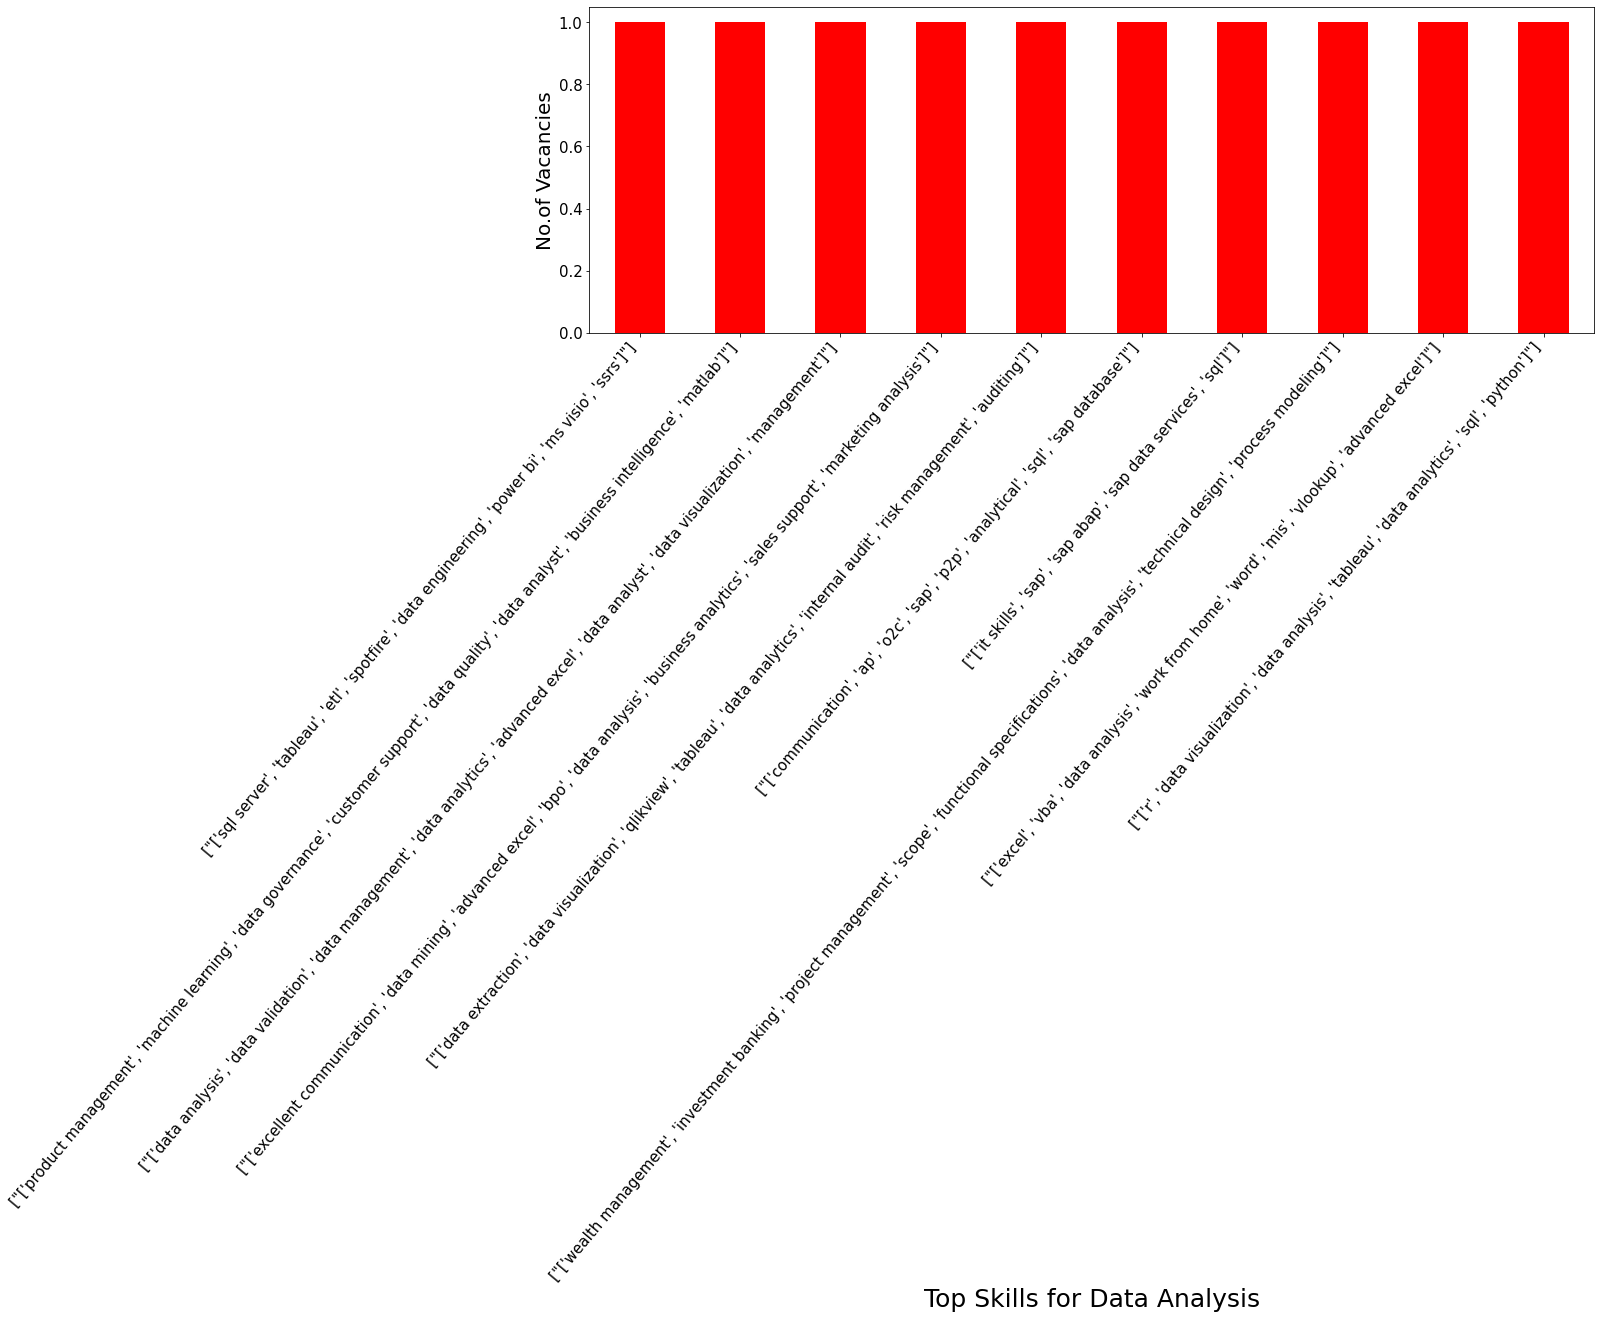

In [19]:
DA_jobs_df.skills.apply(pd.Series).stack().value_counts()[:10].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data Analysis",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data Analysis",fontsize=25)
plt.show()

In [21]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for pre processing
jj=pd.DataFrame(DA_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["skills","count"]
jj.head(10)

,skills,count
0,"[""['sql server', 'tableau', 'etl', 'spotfire',...",1
1,"[""['product management', 'machine learning', '...",1
2,"[""['data analysis', 'data validation', 'data m...",1
3,"[""['excellent communication', 'data mining', '...",1
4,"[""['data extraction', 'data visualization', 'q...",1
5,"[""['communication', 'ap', 'o2c', 'sap', 'p2p',...",1
6,"[""['it skills', 'sap', 'sap abap', 'sap data s...",1
7,"[""['wealth management', 'investment banking', ...",1
8,"[""['excel', 'vba', 'data analysis', 'work from...",1
9,"[""['r', 'data visualization', 'data analysis',...",1


In [22]:
#lets first find the top skills for Data science in general
datascience={}
datascience['statistics']=jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=jj["count"][jj['skills'].str.contains('big', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': 609,
 'data_analysis': 222,
 'data_mining': 163,
 'statistics': 138,
 'big_data': 135,
 'nlp': 112,
 'deep_learning': 104,
 'computer_vision': 35}

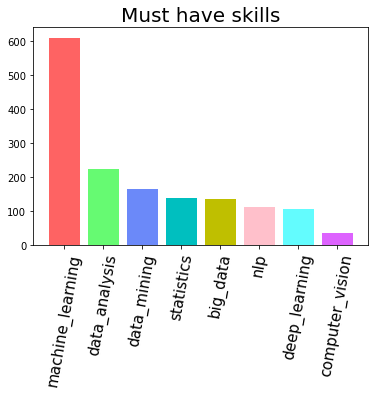

In [23]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

In [24]:
languages={}
languages["python"]=jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"]=jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

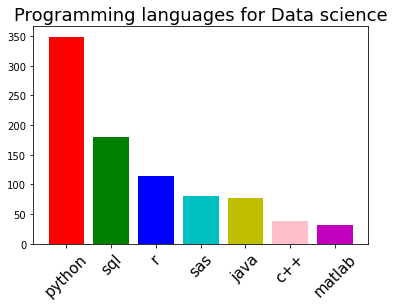

In [25]:
plt.bar(languages.keys(),languages.values(),color=["r","g","b","c","y","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

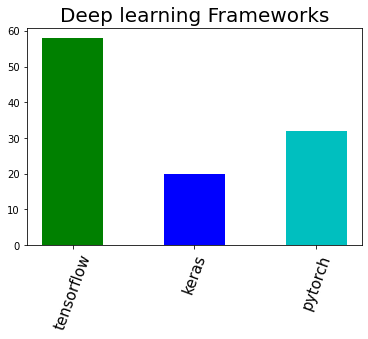

In [26]:
frameworks={}
frameworks['tensorflow']=jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()


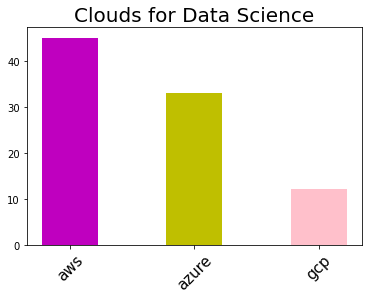

In [27]:
#lets find the skills based on cloud providers
cloud={}
cloud['aws']=jj["count"][jj['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=jj["count"][jj['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=jj["count"][jj['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

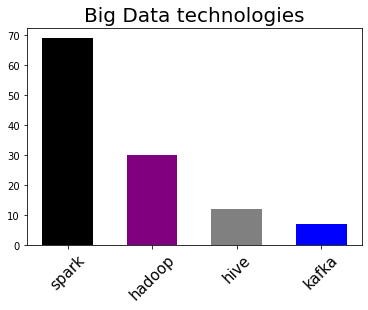

In [28]:
bigdata={}
bigdata["spark"]=jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

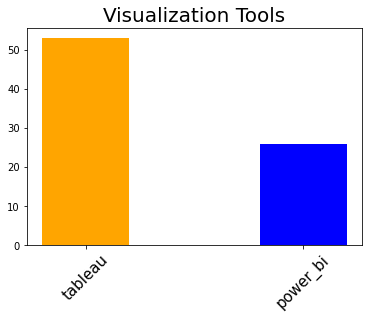

In [29]:
# tools
tools={}
tools["tableau"]=jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()